## Health Risk Prediction

### 
### Steps I need to follow :

- **Problem Understanding**
- **Dataset Selection**
- **Data Analysis (EDA)**
- **Data Cleaning**
- **Data Preprocessing**
- **Feature Understanding**
- **ML Model Basics**
- **Training the Model**
- **Evaluation**
- **Interpretation of Results**
- **Mini Documentation (for resume + interview)**

### Step - 1 : Problem Understanding

#### What is our problem?
##### We want to predict health risk of a person based on details like:
##### 1)Age
##### 2)BMI
##### 3)Blood Pressure
##### 4)Glucose
##### 5)Lifestyle factors, etc.
#### What does “Health Risk Prediction” mean?
##### It means:
##### Using past data of people → learn patterns → predict whether a new person is at low / medium / high risk.

### Step - 2 : DataSet Selection

#### Note : “A bad dataset can destroy a good ML model.”

#### DataSet Name : "Pima Indians Diabetes Dataset"
#### Why THIS Dataset?             
#### 1)Beginner-friendly	
#### 2)Real health data	
#### 3)Clean size	        
#### 4)Popular	        
#### 5)Binary prediction	
#### Each row = one person
#### Each column = health measurement
#### Features (Inputs)
#### 1)Pregnancies
#### 2)Glucose
#### 3)BloodPressure
#### 4)SkinThickness
#### 5)Insulin
#### 6)BMI
#### 7)DiabetesPedigreeFunction
#### 8)Age
#### Target (Output)
#### 1)Outcome
#### 0 → No Diabetes (Low Risk)
#### 1 → Diabetes (High Risk)

### Step - 3 : DataAnalysis(EDA)
#### What is EDA? (Exploratory Data Analysis)
##### Systematically analyzing data to understand its structure, patterns, distributions, and problems before building any model.
##### Think of EDA as:
##### 🩺 Health check of the dataset
##### 🔍 Finding hidden issues
##### 🧠 Developing intuition about data

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# STEP-3.1: Load Dataset & Understand Structure
data = pd.read_csv("diabetes.csv")
data.shape # rows -> number of people & columns -> features + target

(768, 9)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns # all are in numeric format so no need to do encoding

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### WHY analyze target first?
#### Because:
#### It tells us what problem we’re solving
#### It reveals class imbalance
#### It affects model choice & evaluation

In [11]:
# STEP-3.2: Target Variable Analysis
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

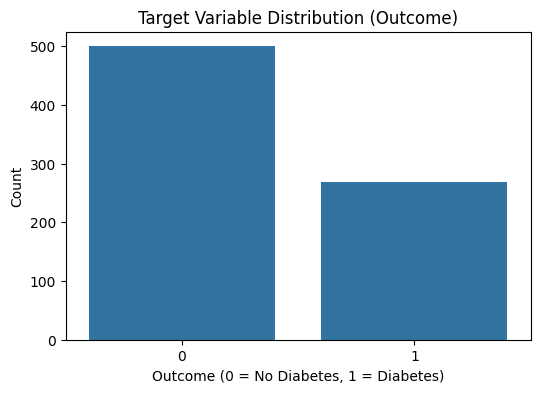

In [12]:
# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data)
plt.title("Target Variable Distribution (Outcome)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


### Insight:
#### 0 -> Non - Diabetic
#### 1 -> Diabetic
#### As per above analysis, it says Non - Diabetic > Diabetic persons and dataset is imbalanced

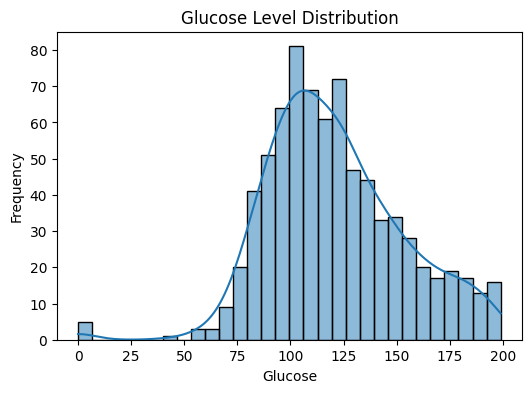

In [14]:
# STEP-3.3: Feature Distribution Analysis
# 1) Glucose
plt.figure(figsize=(6,4))
sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()


#### The Graph is touching x-axis at 0 it means there are no zero values in the glucose column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the glucose. So Treat them as Missing values.

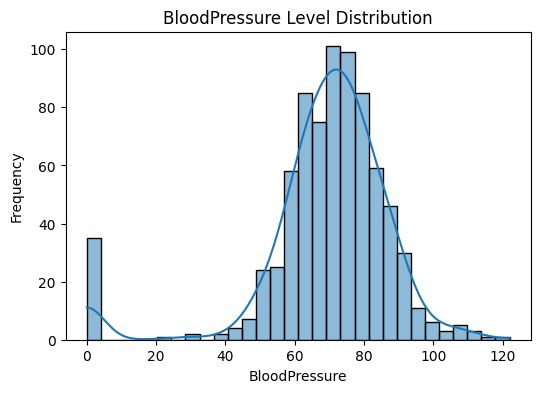

In [16]:
# 2) BloodPressure
plt.figure(figsize=(6,4))
sns.histplot(data['BloodPressure'], bins=30, kde=True)
plt.title("BloodPressure Level Distribution")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the BloodPressure column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the BloodPressure. So Treat them as Missing values.

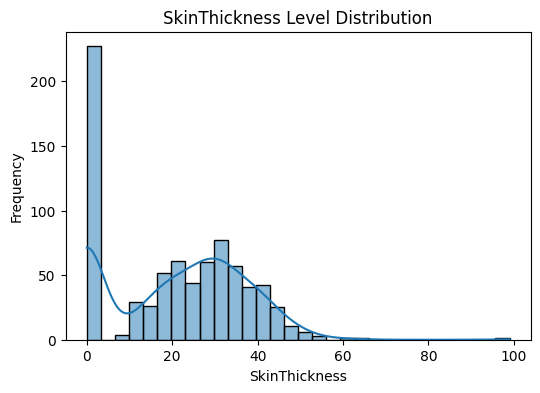

In [ ]:
# 3) SkinThickness
plt.figure(figsize=(6,4))
sns.histplot(data['SkinThickness'], bins=30, kde=True)
plt.title("SkinThickness Level Distribution")
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the SkinThickness column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the SkinThickness. So Treat them as Missing values.

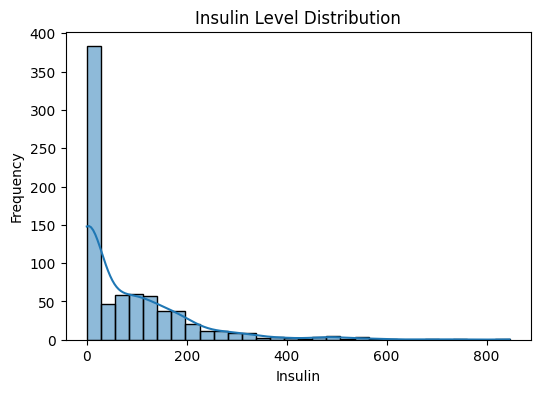

In [19]:
# 4) Insulin
plt.figure(figsize=(6,4))
sns.histplot(data['Insulin'], bins=30, kde=True)
plt.title("Insulin Level Distribution")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the Insulin column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the Insulin. So Treat them as Missing values.

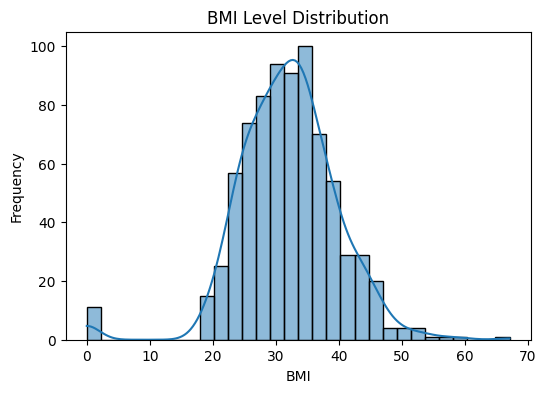

In [ ]:
# 5) BMI
plt.figure(figsize=(6,4))
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title("BMI Level Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the BMI column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the BMI. So Treat them as Missing values.

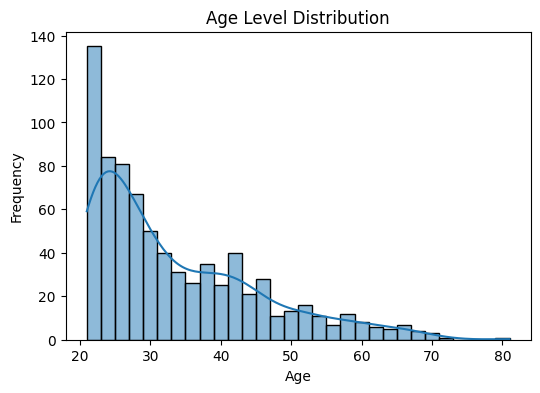

In [20]:
# 6) Age
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Level Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### There are no 0 values in age column. So we can't treat them as missing values.

In [22]:
# Replace 0 with Nan Values 
invalid_zero_cols = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]
data[invalid_zero_cols] = data[invalid_zero_cols].replace(0, np.nan)

In [ ]:
data.isnull().sum() # checks Null Values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64